In [1]:
import numpy as np
from DG_classes import *
from DiffusionGeometry import *
import matplotlib.pyplot as plt
from DG_ml_stats import *
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from visualisation import *

In [2]:
parameters = {}
parameters['n0'] = 50
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.3
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2

# parameters

{'n0': 50, 'n1': 16, 'n2': 4, 'ep': 0.3, 'alpha': 1, 'projection_tol': 0.01}

array([ -0.   ,   1.307,   8.372,   9.077,  15.191,  15.543,  22.989,
        24.682,  32.813,  33.574,  36.814,  41.721,  44.053,  48.327,
        53.512,  54.438,  56.128,  61.551,  62.792,  65.419,  67.29 ,
        74.452,  76.492,  80.283,  81.989,  84.672,  85.856,  91.01 ,
        94.103,  95.41 ,  97.91 , 102.234, 104.7  , 110.133, 110.877,
       112.735, 116.635, 117.791, 122.772, 124.575, 127.498, 129.993,
       133.247, 135.639, 138.593, 140.381, 144.028, 145.072, 149.582,
       153.188])

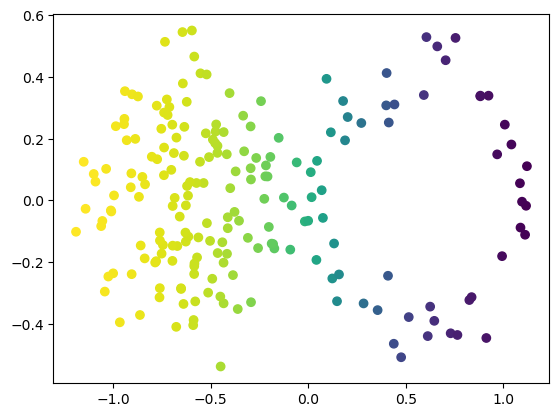

In [3]:
n = 100
xx = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in xx]) + 0.2*np.random.randn(xx.shape[0], 2)
data = 1*np.array([[np.cos(x)/(1 + np.sin(x)**2), np.sin(x)*np.cos(x)/(1 + np.sin(x)**2)] for x in xx]) + 0.06*np.random.randn(xx.shape[0], 2) + 0.1*data

data = np.concatenate((data, 0.2*np.random.randn(100,2) - [0.6,0]))

test = DG(data, parameters)

plt.scatter(test.data[:,0], test.data[:,1], c = test.u()[1])
# test.weak_eigenproblem_1(test.D1())

test.lam().round(3)

## Local metric testing

array([ -0.   ,   1.051,   1.16 ,   3.835,   5.427,   8.639,  11.392,
        16.37 ,  16.844,  23.781,  25.324,  30.489,  30.762,  33.01 ,
        35.756,  38.017,  38.953,  40.438,  44.458,  46.442,  49.181,
        50.338,  55.08 ,  57.298,  57.605,  61.3  ,  62.758,  64.534,
        67.958,  71.146,  74.023,  75.317,  78.618,  82.281,  82.883,
        84.303,  88.248,  90.7  ,  92.597,  93.669,  96.747,  98.642,
       101.396, 102.953, 107.617, 110.79 , 113.122, 114.325, 116.662,
       118.866])

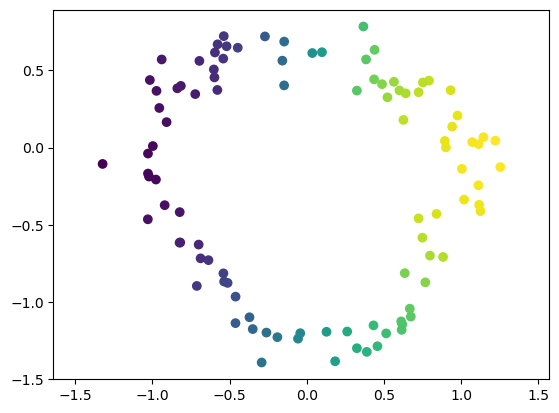

In [4]:
parameters = {}
parameters['n0'] = 50
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.3
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2

n = 100
xx = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x) + 0.1*np.cos(5*x), 0.2*x*np.sin(x) + 0.3*np.sin(x)] for x in xx]) + 0.*np.random.randn(xx.shape[0], 2)
# data = 1*np.array([[np.cos(x)/(1 + np.sin(x)**2), np.sin(x)*np.cos(x)/(1 + np.sin(x)**2)] for x in xx]) + 0.01*np.random.randn(xx.shape[0], 2) + 0.1*data
# data = np.array([[np.cos(x), np.sin(x)] for x in xx])

# data = np.concatenate((data, 0.2*np.random.randn(100,2) - [0.6,0]))
curve = np.array([[x*0.8 - 3.1, 0.2*np.sin(x)] for x in xx[::2]]) 

# data = np.concatenate((data, -curve))
# data = np.concatenate((data, data - [1.2,0], curve ))
data += 0.01*np.random.randn(data.shape[0],data.shape[1])
data += 0.1*np.random.randn(data.shape[0],data.shape[1])
# data = np.concatenate((data, 0.5*np.random.randn(10,data.shape[1])))
test = DG(data, parameters)

data = np.array([[np.cos(x), np.sin(x)] for x in xx])

# fig, ax = plt.subplots(figsize = (8,6))
# ax.plot(data[:,0], data[:,1], c = 'k')
# ax.plot(data[:,0] - 1.2, data[:,1], c = 'k')
# ax.plot(curve[:,0], curve[:,1], c = 'k')
# ax.axis('off')

plt.scatter(test.data[:,0], test.data[:,1], c = test.u()[1])
plt.axis('equal')
# test.weak_eigenproblem_1(test.D1())

test.lam().round(3)


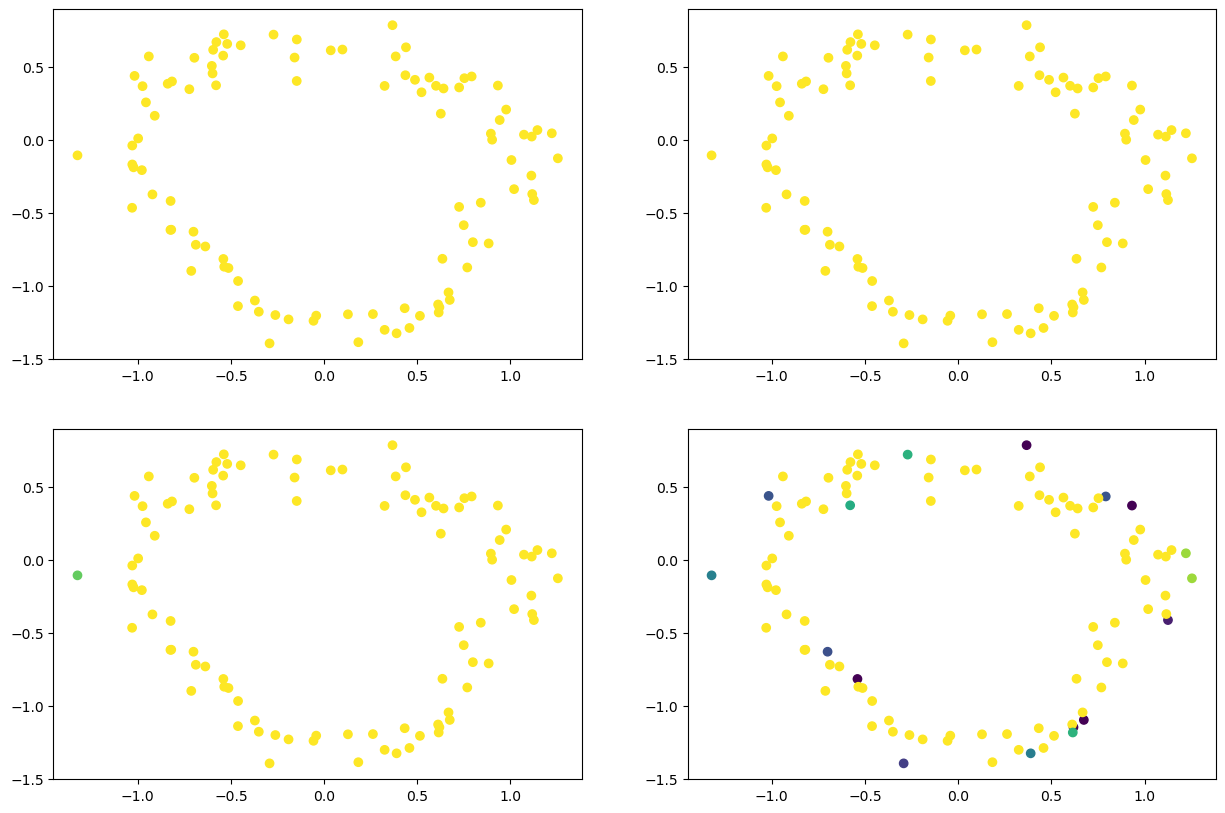

In [5]:
def pointwise_CdC(lam, u, C3_000):
    cdc = (1/2)*(lam.reshape(-1,1,1)
                 +lam.reshape(1,-1,1)
                 -lam.reshape(1,1,-1))*C3_000
    return contract('ijk,ks->sij', cdc, u)

def pointwise_metric_eigenvalues(pointwise_cdc, max_val = 5):
    n0 = pointwise_cdc.shape[-1]
    return np.array([eigh(m, eigvals_only=True, subset_by_index=[n0-max_val,n0-1])[::-1] for m in pointwise_cdc])

pointwise_cdc = pointwise_CdC(test.lam(), test.u(), test.C3_000())
pointwise_eigenvalues = pointwise_metric_eigenvalues(pointwise_cdc)


val1 = pointwise_eigenvalues[:,0]
val2 = pointwise_eigenvalues[:,2]

vmin = 0.2
vmax = 0.3

fig, ax = plt.subplots(2,2,figsize = (15,10))
ax[0,0].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,0], vmin = vmin, vmax = vmax)
ax[0,1].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,1], vmin = vmin, vmax = vmax)
ax[1,0].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,2], vmin = vmin, vmax = vmax)
ax[1,1].scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues[:,3], vmin = vmin, vmax = vmax)

# plt.scatter(test.data[:,0], test.data[:,1], c = pointwise_eigenvalues.sum(axis=1), vmin = 0, vmax = 10)

In [6]:
def plot_scatter_limits(data, c, lower_col_min, lower_col_max, upper_col_min, upper_col_max):

    fig = go.Figure()

    fig.add_trace(go.Scatter(x = data[:,0], 
                             y = data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         cmin = lower_col_min,
                                         cmax = lower_col_max,
                                         color="lightgray")))
    
    opacity_upper = np.clip(c, upper_col_min, upper_col_max)
    opacity_upper -= upper_col_min
    opacity_upper /= upper_col_max - upper_col_min

    fig.add_trace(go.Scatter(x = data[:,0], 
                             y = data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         color = "#166dde",
                                         opacity=opacity_upper)))
    
    opacity_lower = np.clip(c, lower_col_min, lower_col_max)
    opacity_lower -= lower_col_min
    opacity_lower /= lower_col_max - lower_col_min
    opacity_lower = 1 - opacity_lower
    
    fig.add_trace(go.Scatter(x = data[:,0], 
                             y = data[:,1], 
                             mode= 'markers',
                             marker=dict(size = 9,
                                         cmid = 0,
                                         color = "#e32636",
                                         opacity=opacity_lower)))
    fig.update_layout(width=800, 
                    height=500, 
                    showlegend=False, 
                    paper_bgcolor='rgba(0,0,0,0)', 
                    plot_bgcolor='rgba(0,0,0,0)', 
                    xaxis_visible=False, 
                    yaxis_visible=False,
                    xaxis_range = [-1.3,1.3],
                    yaxis_range = [-0.1,0.1])
    fig.update_yaxes(
        scaleanchor="x",
        scaleratio=1,
    )
    return fig

fig1 = plot_scatter_limits(test.data, val1, 0.24, 0.3, 10.8, 11.5)
# plot_scatter_limits(test.data, val1, 0, 1, 18, 20)
fig1.show()
fig1.write_image("images/fig.png", scale = 1)

In [7]:
def tangent_vals_and_vecs(pointwise_cdc, max_val = 1):
    n0 = pointwise_cdc.shape[-1]
    vals = []
    vecs = []
    for m in pointwise_cdc:
        val, vec = eigh(m, subset_by_index=[n0-max_val,n0-1])
        val = val[::-1]
        vec = vec.T[::-1].T
        vec *= np.sign(m[1,:] @ vec)
        vals.append(val)
        vecs.append(vec)
    return np.array(vals), np.array(vecs)


pointwise_cdc = pointwise_CdC(test.lam(), test.u(), test.C3_000())
vals, vecs = tangent_vals_and_vecs(pointwise_cdc, max_val = 5)

In [100]:
tangent_vecs = []
tangent_eigenvals = []
L1, U1 = test.weak_eigenproblem_1(test.D1())
form = U1[:,0]
for i, (val, vec) in enumerate(zip(vals,vecs)):
    f = vec[:,0] #+ np.sign(np.dot(vec[:,0],vec[:,1])) * vec[:,1] + np.sign(np.dot(vec[:,0],vec[:,2])) * vec[:,2]
    # f *= np.sign(form.T @ test.d0_w() @ f)
    # f[12:] = 0
    tangent_eigenvals.append(val)
    tangent_vecs.append(test.vector_field_coords(test.d0() @ f)[i])

tangent_bundle = np.array(tangent_vecs)
tangent_bundle /= np.linalg.norm(tangent_bundle, axis = 1).reshape(-1,1)


In [14]:
form.T @ test.d0_w() @ f

plot_quiver_plain_tight(20*test.d0() @ f, test)

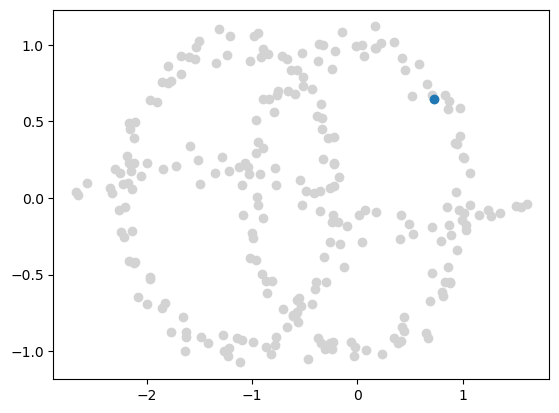

In [102]:
i = 11

plt.scatter(test.data[:,0], test.data[:,1], c = 'lightgray')
plt.scatter(test.data[i,0], test.data[i,1])

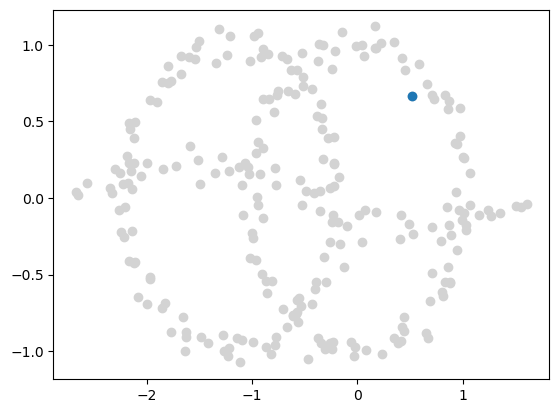

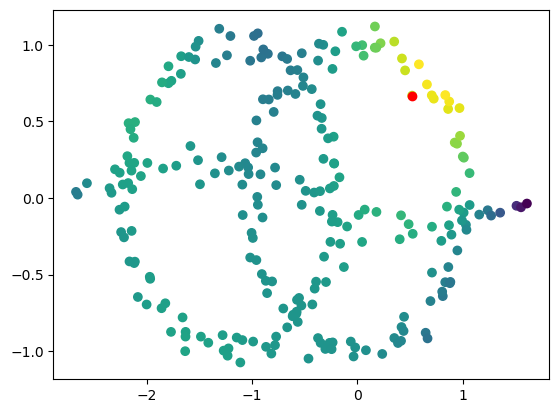

In [129]:
i = 14
f = vecs[i,:,0]
f[20:] = 0
f /= np.linalg.norm(f)
# print(f)
plt.scatter(test.data[:,0], test.data[:,1], c = 'lightgray')
plt.scatter(test.data[i,0], test.data[i,1])
plt.show()
plt.scatter(test.data[:,0], test.data[:,1], c = test.u().T @ f)
plt.scatter(test.data[i,0], test.data[i,1], c = 'red')
plot_quiver_plain(0.2*test.d0() @ f, test)

In [97]:
plot_quiver_plain(test.d0() @ f, test)
# test.vector_field_coords(test.d0() @ f)[i]


In [ ]:
limits = {}
limits['eigenfunctions'] = 10
limits['1-eigenforms-div'] = 6
limits['1-eigenforms-curl'] = 2
limits['use curvature'] = False
limits['Riemann curvature of eigenforms'] = 4
limits['divergence-only threshold'] = 0.5
limits['metric expansion'] = 4
# limits['Riemann curvature of eigenfunction frame'] = 3

# for k in range(8):
#     print(k)
#     limits['Riemann curvature of eigenforms'] = k
#     %timeit feature_vector(DG(data, parameters), limits)
#     print(feature_vector(DG(data, parameters), limits).shape)

feature_vector(DG(data, parameters), limits).shape

In [ ]:
u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data

k = 0
# L1, U1 = test.weak_eigenproblem_1(test.D1())
v = U1[:,k]

v = 2*U1[:,1]
w = 1.3*U1[:,2]
quiver1 = test.vector_field_coords(v)
quiver2 = test.vector_field_coords(w)

g1 = u.T @ contract('i,j,ijs->s', v, v, test.g1())
g2 = u.T @ contract('i,j,ijs->s', v, w, test.g1())

m = 0.8*max(np.absolute(g1).max(), np.absolute(g2).max())

f1 = plot_quiver_plain(v, test)
f2 = plot_quiver_plain(w, test)
f3 = plot_scatter(data, g1, m)
f4 = plot_scatter(data, g2, m)

for f in [f1,f2,f3,f4]:
    f.show()

# f1.write_image("images/fig1.png", scale = 1)
# f2.write_image("images/fig2.png", scale = 1)
# f3.write_image("images/fig3.png", scale = 1)
# f4.write_image("images/fig4.png", scale = 1)

In [ ]:
theta = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in theta]) + 0.1*np.random.randn(xx.shape[0], 2)
data += 0.3*np.array([[np.cos(1*x), np.sin(2*x)] for x in theta])
data += 0.15*np.array([[np.cos(3*x), np.sin(1*x)] for x in theta]) @ np.array([[2,-1],[0,1]])
data = np.concatenate((data, 0.6*np.random.randn(100,2) + [1.5,0], 0.3*np.random.randn(100,2) + [4,0]))
px.scatter(x=data[:,0], y=data[:,1])

In [ ]:

parameters = {}
parameters['n0'] = 30
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.3
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2
test = DG(data, parameters)
test.Riemann()
# L1, U1 = test.weak_eigenproblem_1(test.D1())

u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data

k = 2
# L1, U1 = test.weak_eigenproblem_1(test.D1())
v = -9*U1[:,k]

f = 4 * np.eye(test.parameters['n0'])[4]
print((u.T @ f).max())

quiver1 = test.vector_field_coords(v)
quiver2 = test.vector_field_coords(contract('i,j,ijs->s', v, f, test.wedge_01()))
quiver3 = test.vector_field_coords(test.d0() @ f)

m = 1*max(u.T @ f)

f1 = plot_quiver_plain(v, test)
f3 = plot_quiver_plain(contract('i,j,ijs->s', v, f, test.wedge_01()), test)
f4 = plot_quiver_plain(test.d0() @ f, test)
f2 = plot_scatter(data, u.T @ f, m)

for f in [f1,f2,f3,f4]:
    f.show()

f1.write_image("images/fig1.png", scale = 1)
f2.write_image("images/fig2.png", scale = 1)
f3.write_image("images/fig3.png", scale = 1)
f4.write_image("images/fig4.png", scale = 1)

In [ ]:
theta = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in theta]) + 0.1*np.random.randn(xx.shape[0], 2)
data += 0.3*np.array([[np.cos(1*x), np.sin(2*x)] for x in theta])
data += 0.15*np.array([[np.cos(5*x), np.sin(1*x)] for x in theta]) @ np.array([[2,-1],[0,1]])
data = np.concatenate((1.4*data, 0.14*np.random.randn(40,2) + [0.4,0]))
px.scatter(x=data[:,0], y=data[:,1])

In [ ]:

parameters = {}
parameters['n0'] = 90
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.3
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2
test = DG(data, parameters)
test.Riemann()
L1, U1 = test.weak_eigenproblem_1(test.D1())
# print(L1)

u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data

k = 0
# L1, U1 = test.weak_eigenproblem_1(test.D1())
v = 9*U1[:,k]

func = 4 * np.eye(test.parameters['n0'])[1]
funch = 4 * np.eye(test.parameters['n0'])[4]

v_VF = -(G1_vf @ v).reshape(parameters['n0'],parameters['n0'])
v_VF /= eigh(v_VF)[0][-10]

func1 = v_VF @ func
funch1 = v_VF @ funch

func2 = np.linalg.svd(np.eye(test.parameters['n0']) - v_VF)[0][:,-1]
func2 *= -np.sign(func2[0])


# func2 = v_VF @ v_VF @ func

quiver1 = test.vector_field_coords(v)

m = 1*max(u.T @ func)
mh = 1*max(u.T @ funch)
m1 = 0.3*max(np.absolute(u.T @ func1))
m1h = 0.3*max(np.absolute(u.T @ funch1))
m2 = 1.2*max(np.absolute(u.T @ func2))

f1 = plot_quiver_plain_tight(v, test)
f2 = plot_scatter_tight(data, u.T @ func, m)
f3 = plot_scatter_tight(data, u.T @ func1, m1)
f4 = plot_scatter_tight(data, u.T @ funch, mh)
f5 = plot_scatter_tight(data, u.T @ funch1, m1h)
f6 = plot_scatter_tight(data, u.T @ func2, m2)

# f2.show()
# f3.show()
f6.show()
# for f in [f1,f2,f3,f4,f5,f6]:
#     f.show()



# f1.write_image("images/fig1.png", scale = 1)
# f2.write_image("images/fig2.png", scale = 1)
# f3.write_image("images/fig3.png", scale = 1)
# f4.write_image("images/fig4.png", scale = 1)
# f5.write_image("images/fig5.png", scale = 1)
# f6.write_image("images/fig6.png", scale = 1)

In [ ]:
test.plot_eigenfunctions(3,3)

In [ ]:
theta = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in theta]) + 0.2*np.random.randn(xx.shape[0], 2)
data += 0.3*np.array([[np.cos(1*x), np.sin(2*x)] for x in theta])
# data += 0.15*np.array([[np.cos(5*x), np.sin(1*x)] for x in theta]) @ np.array([[2,-1],[0,1]])
data = np.concatenate((1.2*data, 0.14*np.random.randn(40,2) + [0.4,0.2], 0.3*np.random.randn(50,2) + [0.4,1]))
px.scatter(x=data[:,0], y=data[:,1])

In [ ]:

parameters = {}
parameters['n0'] = 90
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.18
parameters['alpha'] = 0.9
parameters['projection_tol'] = 1e-2
test = DG(data, parameters)
test.Riemann()
L1, U1 = test.weak_eigenproblem_1(test.D1())
print(L1.round(2))
U1 *= 40
u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data


In [ ]:


f1 = plot_quiver_plain_tight(U1[:,0], test)
f2 = plot_quiver_plain_tight(-U1[:,1], test)
f3 = plot_quiver_plain_tight(-U1[:,2], test)
f4 = plot_quiver_plain_tight(-U1[:,3], test)
f5 = plot_quiver_plain_tight(-U1[:,4], test)
f6 = plot_quiver_plain_tight(U1[:,5], test)

# f2.show()
# f3.show()
# f4.show()
for f in [f1,f2,f3,f4,f5,f6]:
    f.show()

f1.write_image("images/fig1.png", scale = 1)
f2.write_image("images/fig2.png", scale = 1)
f3.write_image("images/fig3.png", scale = 1)
f4.write_image("images/fig4.png", scale = 1)
f5.write_image("images/fig5.png", scale = 1)
f6.write_image("images/fig6.png", scale = 1)

In [ ]:
np.linalg.svd(v_VF)[1].round(3)

In [ ]:
n = 50
theta = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in theta]) + 0.1*np.random.randn(n, 2)
data += 0.3*np.array([[np.cos(1*x), np.sin(2*x)] for x in theta])
data += 0.15*np.array([[np.cos(1*x), np.sin(1*x)] for x in theta]) @ np.array([[2,-1],[0,1]])
data = np.concatenate((0.4*data, 0.3*np.random.randn(60,2) + [1,0], 0.1*np.random.randn(60,2) - [1,0]))
px.scatter(x=data[:,0], y=data[:,1])

In [ ]:

parameters = {}
parameters['n0'] = 90
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.3
parameters['alpha'] = 0.9
parameters['projection_tol'] = 1e-2
test = DG(data, parameters)
test.Riemann()
L1, U1 = test.weak_eigenproblem_1(test.D1())
print(L1.round(2))
U1 *= 40
u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data

In [ ]:
def Levi_Civita_matrix(G1, G1_VF, G1_inv, g1, LB, u, parameters):
    # a_i, b_j -> [a,b]_k
    n,n0,n1,n2 = parameters['n'], parameters['n0'], parameters['n1'], parameters['n2']
    # \int X(g(Y,Z))
    LCC1 = contract('jk,lmj->klm', G1_VF.reshape(n0,n0,n1*n2)[0], g1) / u[0,0]
    # \int X(g(Y,Z)) + \int Y(g(Z,X)) - \int Z(g(X,Y))
    LCC1 = LCC1 + LCC1.transpose((1,2,0)) - LCC1.transpose((2,0,1))
    # <[X,Y],Z>
    LCC2 = contract('ijk,kl', LB, G1)
    # <[X,Y],Z> - <[Y,Z],X> + <[Z,X],Y>
    LCC2 = LCC2 - LCC2.transpose((2,0,1)) + LCC2.transpose((0,2,1))
    LCC = (LCC1 + LCC2)/2
    # Convert the variational form into the frame representation with the pseudo-inverse of G1.
    LCC = contract('ijk,kl', LCC, G1_inv)
    return LCC

LCC1 = Levi_Civita_matrix(test.G1(), test.G1_VF(), test.G1_inv(), test.g1(), Lie, test.u(), test.parameters)

# LCC1 - LCC

# n1, n2 = parameters['n1'], parameters['n2']
# contract('jk,lmj->klm', test.G1_VF().reshape(n0,n0,n1*n2)[0], test.g1()).shape

In [ ]:

parameters = {}
parameters['n0'] = 40
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.2
parameters['alpha'] = 0.3
parameters['projection_tol'] = 1e-2
test = DG(data, parameters)
test.Riemann()
L1, U1 = test.weak_eigenproblem_1(test.D1())
print(L1.round(2))
U1 *= 600
u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data

v = U1[:,1]
w = U1[:,3]

f1 = plot_quiver_plain(v, test)
f2 = plot_quiver_plain(w, test)
f3 = plot_quiver_plain(contract('i,j,ijs',v,w,Lie), test)
f4 = plot_quiver_plain(contract('i,j,ijs',v,w,LCC1), test)

# f2.show()
# f3.show()
# f4.show()
for f in [f1,f2,f3,f4]:
    f.show()

f1.write_image("images/fig1.png", scale = 1)
f2.write_image("images/fig2.png", scale = 1)
f3.write_image("images/fig3.png", scale = 1)
f4.write_image("images/fig4.png", scale = 1)

In [ ]:
d = contract('i,j,ijs',v,w,test.Levi_Civita()) - contract('i,j,ijs',w,v,test.Levi_Civita()) - contract('i,j,ijs',v,w,test.Lie())

d.T @ test.G1() @ d

d

In [ ]:

parameters = {}
parameters['n0'] = 90
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.15
parameters['alpha'] = 0.3
parameters['projection_tol'] = 1e-2
test = DG(data, parameters)
# test.Riemann()
# L1, U1 = test.weak_eigenproblem_1(test.D1())
# print(L1.round(2))
# U1 *= 200
# u = test.u()
# G1_vf = test.G1_VF()
# n0 = test.parameters['n0']
# data = test.data

test.plot_eigenfunctions(3,3)

In [ ]:
n = 100
theta = np.linspace(0, 1.5*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in theta]) + 0.1*np.random.randn(n, 2)
data += 0.3*np.array([[np.cos(1*x), np.sin(2*x)] for x in theta])
data += 0.15*np.array([[np.cos(2*x), np.sin(2*x)] for x in theta]) @ np.array([[2,-1],[0,1]])
data = np.concatenate((0.4*data, 0.1*np.random.randn(60,2) + [0,0]))
px.scatter(x=data[:,0], y=data[:,1])

In [ ]:
test.plot_eigenfunctions(3,4)

In [ ]:

parameters = {}
parameters['n0'] = 90
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.08
parameters['alpha'] = 0.8
parameters['projection_tol'] = 1e-2
test = DG(data, parameters)
test.Riemann()
L1, U1 = test.weak_eigenproblem_1(test.D1())
print(L1.round(2))
U1 *= 10
u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data
LB = lie_bracket_matrix(test.G1_VF(), test.G1_inv(), test.parameters)
LCC = Levi_Civita_matrix(test.G1(), test.G1_VF(), test.G1_inv(), test.g1(), LB, test.u(), test.parameters)

v = U1[:,0]
w = U1[:,1]
func = np.eye(n0)[4]
dfunc = test.d0() @ func
gdfunc = contract('i,j,ijs', dfunc, dfunc, test.g1())
hess1 = contract('i,j,k,ijks', func, v, v, Hessian(G1_vf, LCC, test.parameters))
hess2 = contract('i,j,k,ijks', func, v, w, Hessian(G1_vf, LCC, test.parameters))


v1 = plot_quiver_plain_tight(v, test)
v2 = plot_quiver_plain_tight(w, test)

m1 = 1*max(u.T @ func)
m2 = 0.7*max(u.T @ gdfunc)
m3 = 0.7*max(u.T @ hess1)
m4 = 0.7*max(u.T @ hess2)


f1 = plot_scatter_tight(data, u.T @ func, m1)
f2 = plot_scatter_tight(data, u.T @ gdfunc, m2)
f3 = plot_scatter_tight(data, u.T @ hess1, m3)
f4 = plot_scatter_tight(data, u.T @ hess2, m4)
# f2 = plot_quiver_plain(U1[:,1], test)
# f3 = plot_quiver_plain(U1[:,2], test)
# f4 = plot_quiver_plain(U1[:,3], test)



# f2.show()
# f3.show()
# f4.show()
for v in [v1,v2]:
    v.show()
for f in [f1,f2,f3,f4]:
    f.show()

f1.write_image("images/fig1.png", scale = 1)
f2.write_image("images/fig2.png", scale = 1)
f3.write_image("images/fig3.png", scale = 1)
f4.write_image("images/fig4.png", scale = 1)

v1.write_image("images/fig5.png", scale = 1)
v2.write_image("images/fig6.png", scale = 1)

In [ ]:
np.linspace(2,4,10)

In [ ]:
test.plot_eigenfunctions

In [ ]:
G1_vf = test.G1_VF()
LB = lie_bracket_matrix(test.G1_VF(), test.G1_inv(), test.parameters)
LCC = Levi_Civita_matrix(test.G1(), test.G1_VF(), test.G1_inv(), test.g1(), LB, test.u(), test.parameters)

n0,n1,n2 = parameters['n0'], parameters['n1'], parameters['n2']

X, Y = np.random.randn(n1*n2), np.random.randn(n1*n2)

def Hessian(G1_vf, LCC, parameters):
    # f_i, X_j, Y_k -> H(f)(X,Y)_l
    n0,n1,n2 = parameters['n0'], parameters['n1'], parameters['n2']
    op_form = G1_vf.reshape(n0,n0,n1*n2)
    XY = contract('ijs,jkt->ikst', op_form, op_form) 
    LCC_op = contract('stj,kj', LCC, G1_vf).reshape(n0,n0,n1*n2,n1*n2)
    return (XY - LCC_op).transpose((1,2,3,0))

Hessian(G1_vf, LCC, test.parameters)

In [ ]:
limits = {}
limits['eigenfunctions'] = 5
limits['1-eigenforms-div'] = 4
limits['1-eigenforms-curl'] = 2
limits['use curvature'] = False
limits['Riemann curvature of eigenforms'] = 3
limits['metric expansion'] = 5

feature_vector(DG_class, limits).shape

In [ ]:
fig = px.scatter(x = data[:,0], y = data[:,1], color = u.T@g2, color_continuous_scale=["red", "black", "green"], color_continuous_midpoint=0)

fig.update_layout(width=800, 
                    height=500)

fig.show()

In [ ]:
u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data

k = 0
# L1, U1 = test.weak_eigenproblem_1(test.D1())
v = U1[:,k]
print(L1[:20].round(3), L1[k])

v = U1[:,0]
w = U1[:,1]
quiver1 = test.vector_field_coords(v)
quiver2 = test.vector_field_coords(w)
lb = contract('i,j,ijs->s', v, w, test.Levi_Civita())
quiver3 = test.vector_field_coords(lb)

print(lb.T @ test.G1() @ lb)

fig1= ff.create_quiver(data[:,0], data[:,1], quiver1[:,0], quiver1[:,1],
                       scale=1,
                       arrow_scale=0.3,
                       line_width=1)
fig2 = ff.create_quiver(data[:,0], data[:,1], quiver2[:,0], quiver2[:,1],
                       scale=1,
                       arrow_scale=0.3,
                       line_width=1)
fig3 = ff.create_quiver(data[:,0], data[:,1], quiver3[:,0], quiver3[:,1],
                       scale=1,
                       arrow_scale=0.3,
                       line_width=1)
fig1.update_yaxes(scaleanchor="x", scaleratio=1)
fig2.update_yaxes(scaleanchor="x", scaleratio=1)
fig3.update_yaxes(scaleanchor="x", scaleratio=1)
fig1.show()
fig2.show()
fig3.show()

In [ ]:
u = test.u()
G1_vf = test.G1_VF()
n0 = test.parameters['n0']
data = test.data

k = 0
# L1, U1 = test.weak_eigenproblem_1(test.D1())
v = U1[:,k]
print(L1[:20].round(3), L1[k])

# v = np.random.randn(test.parameters['n1']*test.parameters['n2'])
# v = v / np.sqrt(v.T @ test.G1() @ v)
# f = gradient_decomp(test.d0_w(), test.lam()) @ v

# quiver = u.T @ (G1_vf @ v).reshape(n0,n0) @ (u @ data)
# quiver2 = u.T @ (G1_vf @ test.d0() @ f).reshape(n0,n0) @ (u @ data)
# quiver2 = test.vector_field_coords(v)
# quiver2 = test.vector_field_coords(v - test.d0() @ f)


# fig = ff.create_quiver(data[:,0], data[:,1], quiver[:,0], quiver[:,1])
fig = ff.create_quiver(data[:,0], data[:,1], quiver2[:,0], quiver2[:,1],
                       scale=5,
                       arrow_scale=0.3,
                       line_width=1)

fig.add_trace(go.Scatter(x=data[:,0], y=data[:,1],
                    mode='markers',
                    marker=dict(size=5, color=u.T @ f)))

fig2 = ff.create_quiver(data[:,0], data[:,1], quiver2[:,0], quiver2[:,1],
                       scale=5,
                       arrow_scale=0.3,
                       line_width=1)
# cap = 100*u.max()
# fig.update_coloraxes(cmax = cap,
#                          cmin = -cap,
#                          cmid = 0)
# fig.add_traces(data = fig2.data)
fig.update_yaxes(scaleanchor="x", scaleratio=1)



# fig.update_traces(marker=dict(size=5, color='green'))

# print(v.T @ test.G1() @ v)
print(((test.d0() @ f).T @ test.G1() @ (test.d0() @ f)).round(3))

fig.show()

In [ ]:
grad = (test.d0() @ gradient_decomp(test.d0_w(), test.lam()) @ U1)
plt.imshow(grad.T @ test.G1() @ grad, cmap='PiYG', vmin = -1, vmax = 1)

In [ ]:
test.lam()

In [ ]:
div_only_proportions = contract('si,st,ti->i', grad, test.G1(), grad)
div_only_indices = np.where(div_only_proportions > 0.5)
div_only_forms = U1[:, div_only_indices].reshape(parameters['n1']*parameters['n2'],-1)
L1[div_only_indices]

In [ ]:
parameters = {}
parameters['n0'] = 12
parameters['n1'] = 16
parameters['n2'] = 4
parameters['ep'] = 0.12
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2


parameters['ep'] = 0.12
class1 = DG(data, parameters)
class1.plot_eigenfunctions(4,3)
u1 = class1.u()

parameters['ep'] = 0.5
class2 = DG(data, parameters)
class2.plot_eigenfunctions(4,3)
u2 = class2.u()

cob = u2 @ diags(class1.D()) @ u1.T

print(cob.round(2))

perm = np.argmax(np.absolute(cob), axis = 1)
print(perm)
np.eye(parameters['n0'])[perm]

In [ ]:
u2[0,0]/u1[0,0]

In [ ]:
k = 4
np.einsum('in,jm,ijks->nmks', U1[:,:k], U1[:,:k], test.Riemann())[np.triu_indices(k)].shape


test.Riemann()[np.triu_indices(test.Riemann().shape[0])].reshape(-1,64).shape

In [ ]:
64*65/2

In [ ]:
n1,n2 = test.parameters['n1'], test.parameters['n2']

In [ ]:
test.Riemann()[np.triu_indices(n1*n2)].T[np.triu_indices(n1*n2)].shape

In [ ]:
25*13

In [ ]:
test.lam()
test.G1()[np.triu_indices(n1*n2)].T
L1

In [ ]:
n1 = test.parameters['n1']
test.C3_000()[:,:,:n1][np.triu_indices(test.parameters['n0'])].T.shape

# U1.shape

In [ ]:
def CdC_110(lam, C3_110, parameters):
    n1 = parameters['n1']
    return (1/2)*(lam[:n1].reshape(-1,1,1)
                 +lam[:n1].reshape(1,-1,1)
                 -lam.reshape(1,1,-1))*C3_110

Gamma = CdC_110(test.lam(), test.C3_110(), test.parameters)
Gamma.shape


In [ ]:
# %timeit Up_Energy1(test.C3_110(), test.lam(), test.parameters)

def Up_Energy1_new(C3_110, lam, parameters):
    CdC = CdC_110(lam, C3_110, parameters)
    n1,n2 = parameters['n1'], parameters['n2']
    UD1 = np.einsum('iIs,jJs -> ijIJ', CdC, CdC[:n2,:n2])
    UD1 -= np.einsum('jIs,iJs -> ijIJ', CdC[:n2], CdC[:,:n2])
    return UD1.reshape(n1*n2,n1*n2)

# %timeit Up_Energy1_new(test.C3_110(), test.lam(), test.parameters)

In [ ]:
def C4_1212(u, D, parameters):
    n,n0,n1,n2 = parameters['n'], parameters['n0'], parameters['n1'], parameters['n2']
    return (u[:n1].reshape(n1,1,1,1,n)
            *u[:n2].reshape(1,n2,1,1,n)
            *u[:n1].reshape(1,1,n1,1,n)
            *u[:n2].reshape(1,1,1,n2,n)*D).mean(axis=-1)

cijkl0_true = C4_1212(test.u(), test.D(), parameters)

In [ ]:
n1,n2 = test.parameters['n1'], test.parameters['n2']
lam = test.lam()
C3 = test.C3_110()
cijkl0 = np.einsum('ijs,kls->ijkl', C3[:,:n2], C3[:,:n2])
tensorD1 = (1/4)*((lam[:n1].reshape(-1,1,1,1)
                    -lam[:n2].reshape(1,-1,1,1))
                    *(-lam[:n1].reshape(1,1,-1,1)
                        +lam[:n2].reshape(1,1,1,-1)))*cijkl0
cikjl1 = np.einsum('iks,jls,s->ijkl', C3, C3[:n2,:n2], lam)
ciljk1 = np.einsum('ils,jks,s->ijkl', C3[:,:n2], C3[:n2,:], lam)
tensorD1 += (1/4)*(lam[:n1].reshape(-1,1,1,1)
            + lam[:n2].reshape(1,-1,1,1)
            + lam[:n1].reshape(1,1,-1,1)
            + lam[:n2].reshape(1,1,1,-1))*(ciljk1-cikjl1)

cikjl2 = np.einsum('iks,jls,s->ijkl', C3, C3[:n2,:n2], lam**2)
ciljk2 = np.einsum('ils,jks,s->ijkl', C3[:,:n2], C3[:n2], lam**2)
tensorD1 += (1/4)*(cikjl2 - ciljk2)

D1 = tensorD1.reshape(n1*n2,n1*n2)

fijkl = (1/4)*((lam[:n1].reshape(-1,1,1,1)
                -lam[:n2].reshape(1,-1,1,1))
                *(-lam[:n1].reshape(1,1,-1,1)
                +lam[:n2].reshape(1,1,1,-1)))*cijkl0

############

CdC = CdC_110(lam, C3, parameters)
UD1 = np.einsum('iIs,jJs -> ijIJ', CdC, CdC[:n2,:n2])
UD1 -= np.einsum('jIs,iJs -> ijIJ', CdC[:n2], CdC[:,:n2])
UD1 = UD1.reshape(n1*n2,n1*n2)

############

(D1 - UD1).max()

In [ ]:
cijkl0[0,0].round(10)
cijkl0_true[0,0].round(10)

In [ ]:
def Up_Energy1(C3_110, lam, parameters):
    n1,n2 = parameters['n1'], parameters['n2']
    cijkl0 = np.einsum('ijs,kls->ijkl', C3_110[:,:n2], C3_110[:,:n2])
    tensorD1 = (1/4)*((lam[:n1].reshape(-1,1,1,1)
                       -lam[:n2].reshape(1,-1,1,1))
                       *(-lam[:n1].reshape(1,1,-1,1)
                         +lam[:n2].reshape(1,1,1,-1)))*cijkl0
    cikjl1 = np.einsum('ijs,kls,s->ikjl', C3_110, C3_110[:n2,:n2], lam)
    ciljk1 = np.einsum('ijs,kls,s->ilkj', C3_110[:,:n2], C3_110[:,:n2], lam)
    tensorD1 += (1/4)*(lam[:n1].reshape(-1,1,1,1) 
                + lam[:n2].reshape(1,-1,1,1) 
                + lam[:n1].reshape(1,1,-1,1) 
                + lam[:n2].reshape(1,1,1,-1))*(ciljk1-cikjl1)

    cikjl2 = np.einsum('ijs,kls,s->ikjl', C3_110, C3_110[:n2,:n2], lam**2)
    ciljk2 = np.einsum('ijs,kls,s->ilkj', C3_110[:,:n2], C3_110[:,:n2], lam**2)
    tensorD1 += (1/4)*(cikjl2 - ciljk2)

    D1 = tensorD1.reshape(n1*n2,n1*n2)
    return D1

In [ ]:
test.data.shape

In [ ]:
Fijkl = C3[:,:n2].reshape(n1,n2,1,1,-1)*C3[:,:n2].reshape(1,1,n1,n2,-1)
Fijkl *= 0.25*(lam[:n1].reshape(-1,1,1,1,1) + lam[:n2].reshape(1,-1,1,1,1) - lam.reshape(1,1,1,1,-1))
Fijkl *= (lam[:n1].reshape(1,1,-1,1,1) + lam[:n2].reshape(1,1,1,-1,1) - lam.reshape(1,1,1,1,-1))
Fijkl = Fijkl.sum(axis = -1)

Fikjl = C3.reshape(n1,1,n1,1,-1)*C3[:n2,:n2].reshape(1,n2,1,n2,-1)
Fikjl *= 0.25*(lam[:n1].reshape(-1,1,1,1,1) + lam[:n1].reshape(1,1,-1,1,1) - lam.reshape(1,1,1,1,-1))
Fikjl *= (lam[:n2].reshape(1,-1,1,1,1) + lam[:n2].reshape(1,1,1,-1,1) - lam.reshape(1,1,1,1,-1))
Fikjl = Fikjl.sum(axis = -1)

Filjk = C3[:,:n2].reshape(n1,1,1,n2,-1)*C3[:n2,:].reshape(1,n2,n1,1,-1)
Filjk *= 0.25*(lam[:n1].reshape(-1,1,1,1,1) + lam[:n2].reshape(1,1,1,-1,1) - lam.reshape(1,1,1,1,-1))
Filjk *= (lam[:n2].reshape(1,-1,1,1,1) + lam[:n1].reshape(1,1,-1,1,1) - lam.reshape(1,1,1,1,-1))
Filjk = Filjk.sum(axis = -1)

UD1 = Up_Energy1_new(C3, lam, test.parameters)

D1 = Up_Energy1(C3, lam, test.parameters)

((Fikjl - Filjk).reshape(n1*n2,n1*n2) - UD1).min()
# (D1 - UD1).min()

In [ ]:
cijkl0 = np.einsum('ijs,kls->ijkl', C3[:,:n2], C3[:,:n2])
tensorFijkl = (1/4)*((lam[:n1].reshape(-1,1,1,1)
                    +lam[:n2].reshape(1,-1,1,1))
                    *(lam[:n1].reshape(1,1,-1,1)
                        +lam[:n2].reshape(1,1,1,-1)))*cijkl0
cijkl1 = np.einsum('ijs,kls,s->ijkl', C3[:,:n2], C3[:,:n2], lam)
tensorFijkl -= (1/4)*(lam[:n1].reshape(-1,1,1,1)
            + lam[:n2].reshape(1,-1,1,1)
            + lam[:n1].reshape(1,1,-1,1)
            + lam[:n2].reshape(1,1,1,-1))*cijkl1

cijkl2 = np.einsum('ijs,kls,s->ijkl', C3[:,:n2], C3[:,:n2], lam**2)
tensorFijkl += (1/4)*cijkl2

# #############

cikjl0 = np.einsum('iks,jls->ijkl', C3[:,:], C3[:n2,:n2])
tensorFikjl = (1/4)*((lam[:n1].reshape(-1,1,1,1)
                    +lam[:n1].reshape(1,1,-1,1))
                    *(lam[:n2].reshape(1,-1,1,1)
                        +lam[:n2].reshape(1,1,1,-1)))*cijkl0
cikjl1 = np.einsum('iks,jls,s->ijkl', C3[:,:], C3[:n2,:n2], lam)
tensorFikjl -= (1/4)*(lam[:n1].reshape(-1,1,1,1)
            + lam[:n2].reshape(1,-1,1,1)
            + lam[:n1].reshape(1,1,-1,1)
            + lam[:n2].reshape(1,1,1,-1))*cikjl1

cikjl2 = np.einsum('iks,jls,s->ijkl', C3[:,:], C3[:n2,:n2], lam**2)
tensorFikjl += (1/4)*cikjl2

##########

i,j,k,l = np.random.randint(0,n1),np.random.randint(0,n2),np.random.randint(0,n1),np.random.randint(0,n2)
print(i,j,k,l)
# i,j,k,l = 4, 1, 3, 3

((lam[i]+lam[j]-lam)*(lam[k]+lam[l]-lam)*C3[i,j]*C3[k,l]).sum(axis=-1) - (lam[i]+lam[j])*(lam[k]+lam[l])*cijkl0[i,j,k,l] + (lam[i]+lam[j]+lam[k]+lam[l])*cijkl1[i,j,k,l] - cijkl2[i,j,k,l]
4*Fikjl[i,j,k,l] - (lam[i]+lam[k])*(lam[j]+lam[l])*cikjl0[i,j,k,l] + (lam[i]+lam[j]+lam[k]+lam[l])*cikjl1[i,j,k,l] - cikjl2[i,j,k,l]


# Fikjl[i,j,k,l]-np.einsum('iks,jls -> ijkl', CdC, CdC[:n2,:n2])[i,j,k,l]# - 0.25*(lam[i]+lam[k])*(lam[j]+lam[l])*cijkl0[i,j,k,l] + 0.25*(lam[i]+lam[j]+lam[k]+lam[l])*cikjl1[i,j,k,l] - 0.25*cikjl2[i,j,k,l]
# ((0.25*(lam[i]+lam[k]-lam)*C3[i,k])*(lam[j]+lam[l]-lam)*C3[j,l]).sum(axis=-1) - 0.25*(lam[i]+lam[k])*(lam[j]+lam[l])*cijkl0[i,j,k,l] + 0.25*(lam[i]+lam[j]+lam[k]+lam[l])*cikjl1[i,j,k,l] - 0.25*cikjl2[i,j,k,l]
# ((0.25*(lam[i]+lam[k]-lam)*C3[i,k])*(lam[j]+lam[l]-lam)*C3[j,l]).sum(axis=-1) - tensorFikjl[i,j,k,l]
(tensorFikjl - Fikjl).min()
# (tensorFijkl - Fijkl).min()


In [ ]:
(cijkl0 - cikjl0).max()

In [ ]:
i,j,k,l = np.random.randint(0,n1),np.random.randint(0,n2),np.random.randint(0,n1),np.random.randint(0,n2)
Fijkl[i,j,k,l] - 0.25*((lam[i]+lam[j]-lam)*(lam[k]+lam[l]-lam)*C[i,j]*C[k,l]).sum(axis=-1)

(Fijkl - np.einsum('ijs,kls -> ijkl', CdC[:,:n2], CdC[:,:n2])).min()

# def CdC_110(lam, C3_110, parameters):
#     n1 = parameters['n1']
#     return (1/2)*(lam[:n1].reshape(-1,1,1)
#                  +lam[:n1].reshape(1,-1,1)
#                  -lam.reshape(1,1,-1))*C3_110


# C = CdC_110(test.lam(), test.C3_110(), test.parameters)

# CdC[i,j,k] - 0.5*(lam[i]+lam[j]-lam[k])*C3[i,j,k]